In [2]:
import pandas as pd

data = pd.read_csv('data_without_null')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [9]:
MP = data.loc[(data['SUBDIVISION'] == 'WEST MADHYA PRADESH') | (data['SUBDIVISION'] == 'EAST MADHYA PRADESH')]
MP.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2034,WEST MADHYA PRADESH,1901,25.8,5.8,5.8,2.8,2.1,41.2,228.9,349.9,47.9,5.6,0.0,2.4,718.2,31.6,10.7,667.9,7.9
2035,WEST MADHYA PRADESH,1902,22.1,8.4,0.0,2.0,5.9,35.9,401.9,179.4,194.1,37.9,10.0,14.2,911.7,30.5,8.0,811.2,62.0
2036,WEST MADHYA PRADESH,1903,5.3,0.0,0.0,0.0,22.3,50.6,304.9,261.1,250.2,55.1,0.0,0.0,949.6,5.3,22.3,866.8,55.1
2037,WEST MADHYA PRADESH,1904,3.2,15.5,14.8,0.0,12.0,96.6,273.0,218.6,125.9,3.3,1.8,9.6,774.4,18.7,26.9,714.1,14.7
2038,WEST MADHYA PRADESH,1905,3.5,4.4,1.1,0.8,3.0,36.1,326.3,137.6,183.5,0.3,0.0,0.0,696.5,7.9,4.9,683.5,0.3


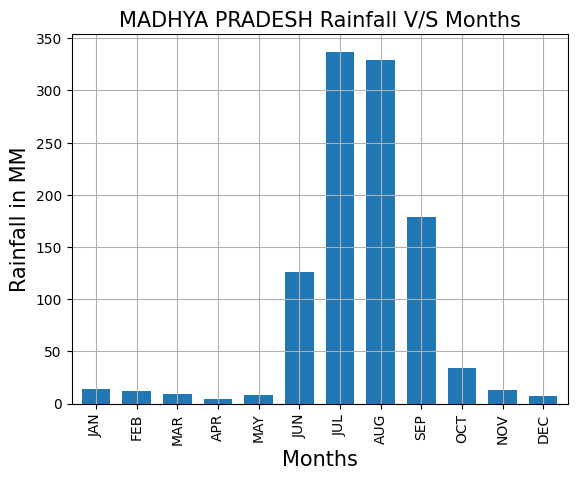

In [12]:
import matplotlib.pyplot as plt

MP[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot(kind="bar",width=0.7,linewidth=3)
plt.title("MADHYA PRADESH Rainfall V/S Months",size=15)
plt.xlabel("Months",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid(axis="both",linestyle="-")
plt.show()

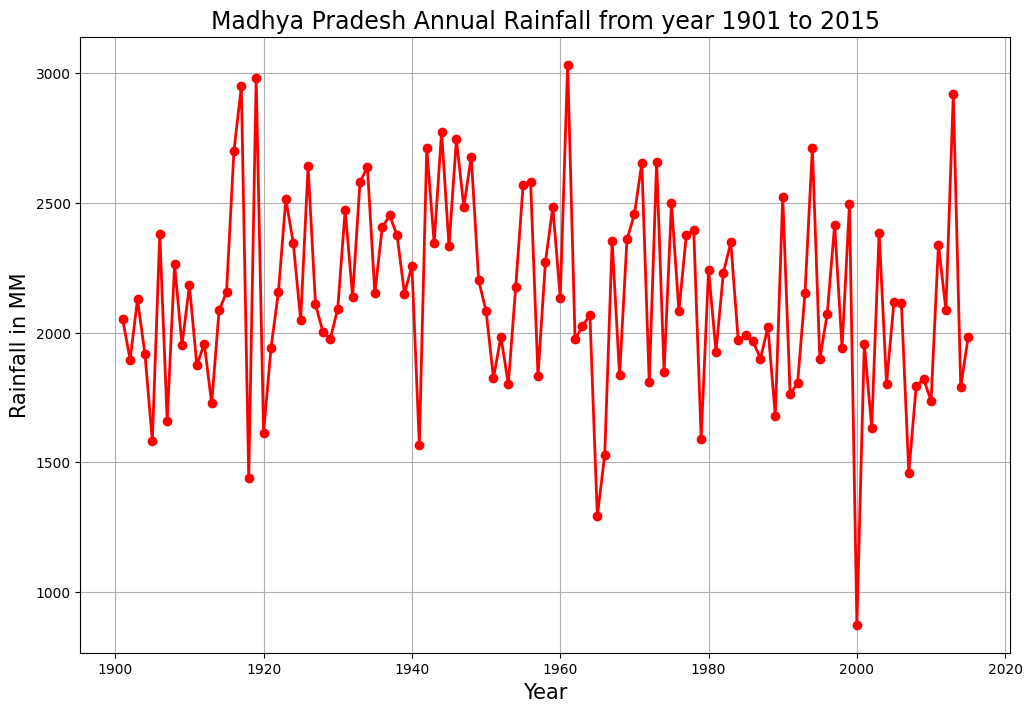

In [18]:
MP.groupby("YEAR").sum()['ANNUAL'].plot(color='r',marker="o",linestyle='-',linewidth=2,figsize=(12,8))
plt.title("Madhya Pradesh Annual Rainfall from year 1901 to 2015",size=17)
plt.xlabel("Year",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid()
plt.show()

In [22]:
group = data.groupby('SUBDIVISION')[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
data = pd.concat([group.get_group('WEST MADHYA PRADESH'), group.get_group('EAST MADHYA PRADESH')])
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2034,1901,25.8,5.8,5.8,2.8,2.1,41.2,228.9,349.9,47.9,5.6,0.0,2.4
2035,1902,22.1,8.4,0.0,2.0,5.9,35.9,401.9,179.4,194.1,37.9,10.0,14.2
2036,1903,5.3,0.0,0.0,0.0,22.3,50.6,304.9,261.1,250.2,55.1,0.0,0.0
2037,1904,3.2,15.5,14.8,0.0,12.0,96.6,273.0,218.6,125.9,3.3,1.8,9.6
2038,1905,3.5,4.4,1.1,0.8,3.0,36.1,326.3,137.6,183.5,0.3,0.0,0.0


In [27]:
df = data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,25.8
1,1,1902,JAN,22.1
2,2,1903,JAN,5.3
3,3,1904,JAN,3.2
4,4,1905,JAN,3.5


In [28]:
df = df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,25.8
114,114,1901,JAN,48.5
229,229,1901,FEB,5.8
343,343,1901,FEB,38.1
458,458,1901,MAR,5.8


In [29]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [30]:
df.columns=['Index','Year','Month','Avg Rainfall']
df.head()

,Index,Year,Month,Avg Rainfall
0,0,1901,JAN,25.8
114,114,1901,JAN,48.5
229,229,1901,FEB,5.8
343,343,1901,FEB,38.1
458,458,1901,MAR,5.8


In [31]:
monthMap = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
df['Month'] = df['Month'].map(monthMap)
df.head(10)

,Index,Year,Month,Avg Rainfall
0,0,1901,1,25.8
114,114,1901,1,48.5
229,229,1901,2,5.8
343,343,1901,2,38.1
458,458,1901,3,5.8
572,572,1901,3,15.7
687,687,1901,4,2.8
801,801,1901,4,10.7
916,916,1901,5,2.1
1030,1030,1901,5,6.2


In [32]:
df.drop(columns="Index",inplace=True)

In [34]:
df.head()

,Year,Month,Avg Rainfall
0,1901,1,25.8
114,1901,1,48.5
229,1901,2,5.8
343,1901,2,38.1
458,1901,3,5.8


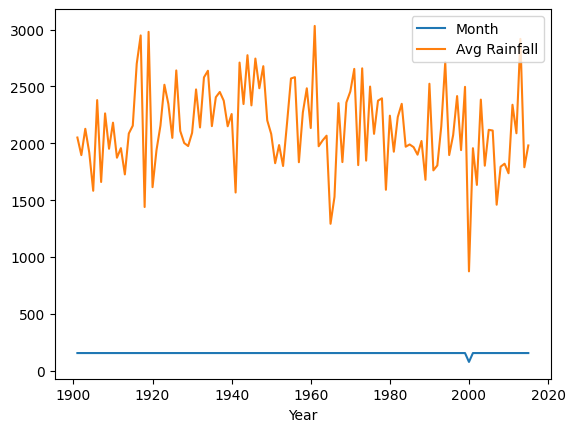

In [35]:
df.groupby("Year").sum().plot()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\4153292416.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg Rainfall'])


<Axes: ylabel='Avg Rainfall'>

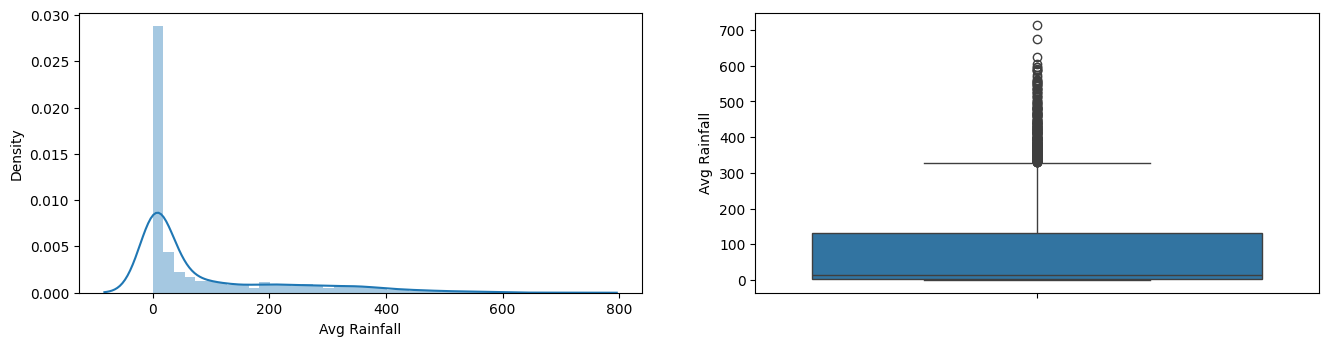

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(df['Avg Rainfall'])

In [37]:
percentile25 = df['Avg Rainfall'].quantile(0.25)
percentile75 = df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

In [38]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df[df['Avg Rainfall'] > upper_limit]
df[df['Avg Rainfall'] < lower_limit]

,Year,Month,Avg Rainfall


In [39]:
new_df = df[df['Avg Rainfall'] < upper_limit]
new_df.shape

(2501, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\118003576.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\118003576.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Avg Rainfall'])


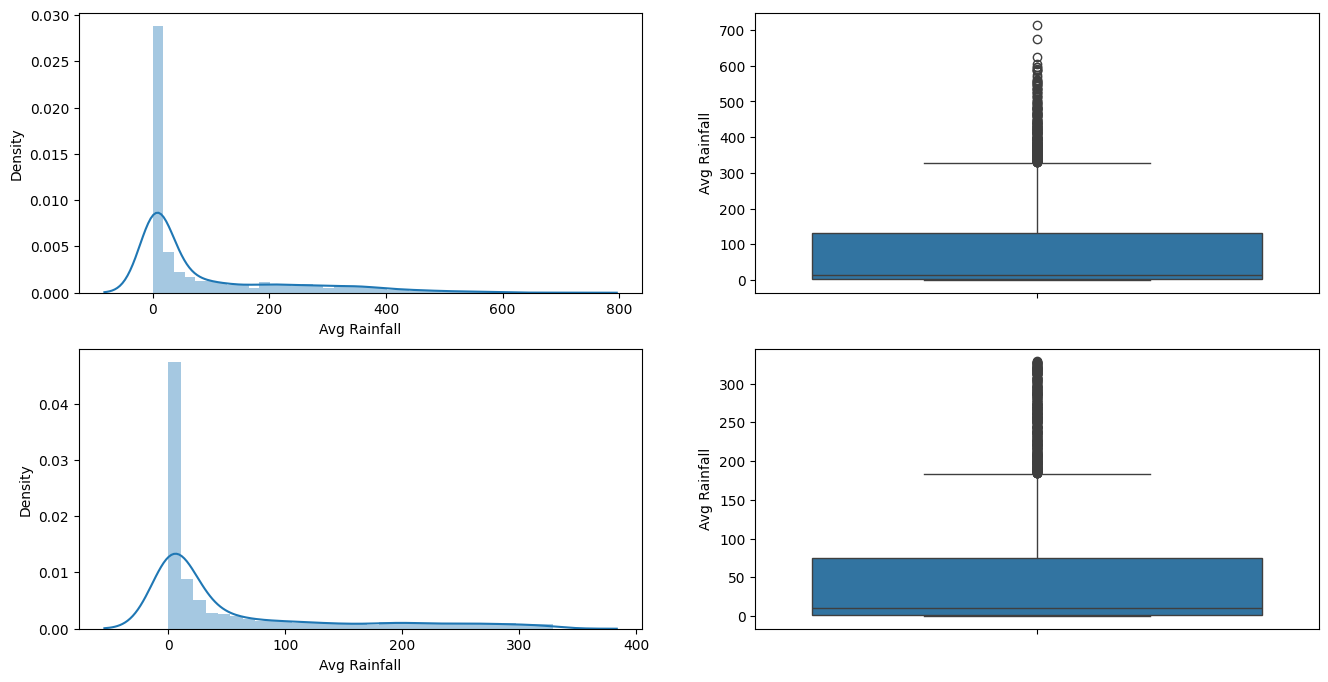

In [40]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(df['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Avg Rainfall'])
plt.show()

In [41]:
percentile25 = new_df['Avg Rainfall'].quantile(0.25)
percentile75 = new_df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df[new_df['Avg Rainfall'] > upper_limit]
new_df[new_df['Avg Rainfall'] < lower_limit]

new_df2 = new_df[new_df['Avg Rainfall'] < upper_limit]
new_df2.shape

(2165, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\2775748692.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\2775748692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['Avg Rainfall'])


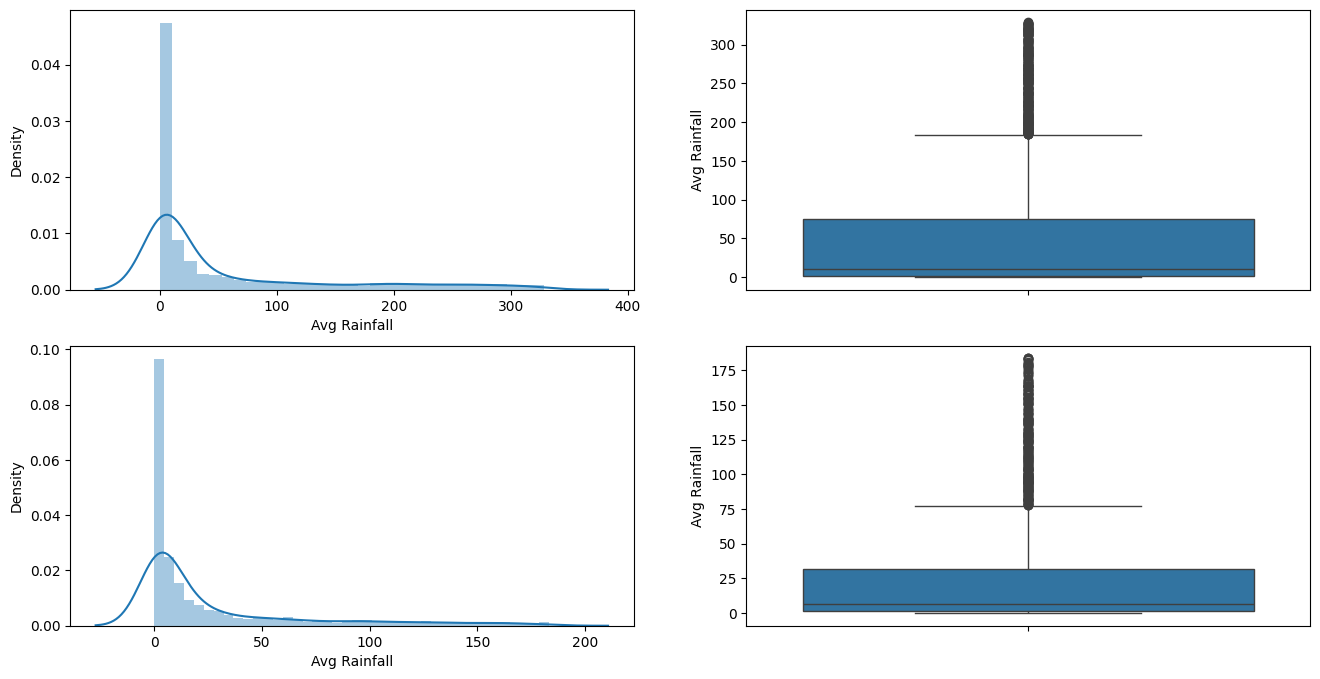

In [42]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df2['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df2['Avg Rainfall'])
plt.show()

In [43]:
percentile25 = new_df2['Avg Rainfall'].quantile(0.25)
percentile75 = new_df2['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df2[new_df2['Avg Rainfall'] > upper_limit]
new_df2[new_df2['Avg Rainfall'] < lower_limit]

new_df3 = new_df2[new_df2['Avg Rainfall'] < upper_limit]
new_df3.shape

(1884, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\1473949475.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\1473949475.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3['Avg Rainfall'])


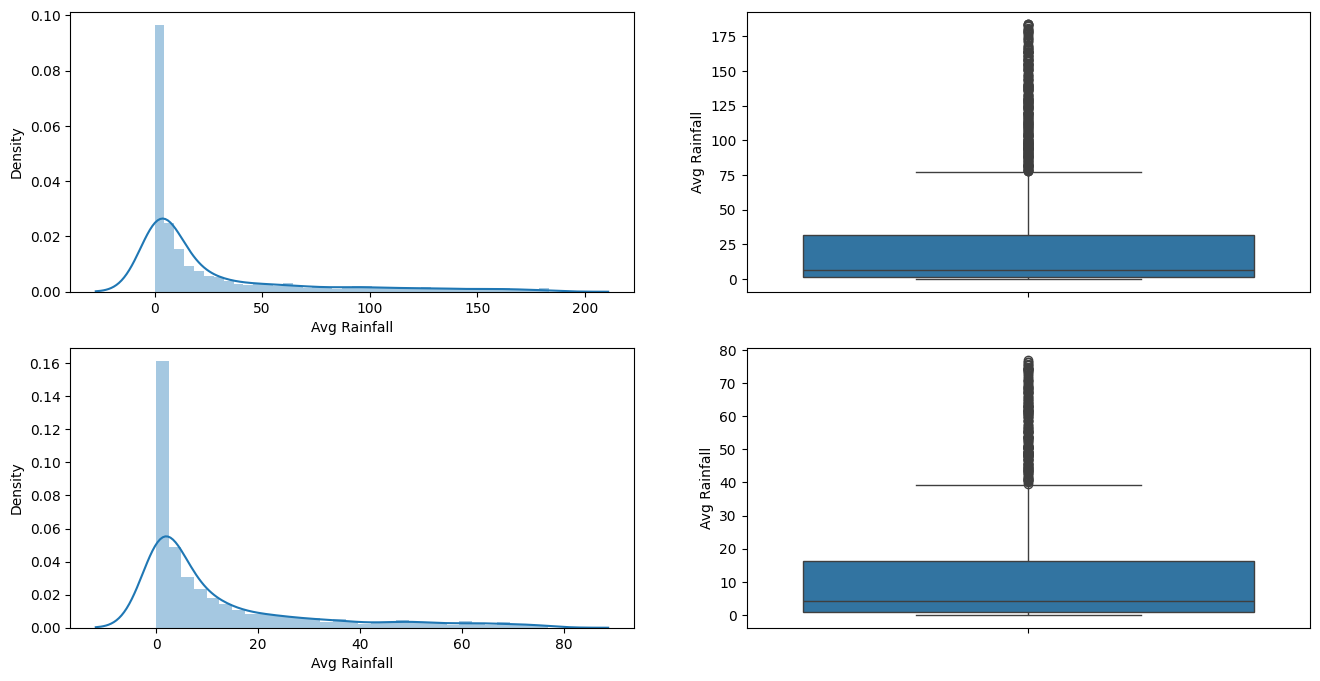

In [44]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df2['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df2['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df3['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df3['Avg Rainfall'])
plt.show()

In [45]:
percentile25 = new_df3['Avg Rainfall'].quantile(0.25)
percentile75 = new_df3['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df3[new_df3['Avg Rainfall'] > upper_limit]
new_df3[new_df3['Avg Rainfall'] < lower_limit]

new_df4 = new_df3[new_df3['Avg Rainfall'] < upper_limit]
new_df4.shape

(1687, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\4083361439.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\4083361439.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df4['Avg Rainfall'])


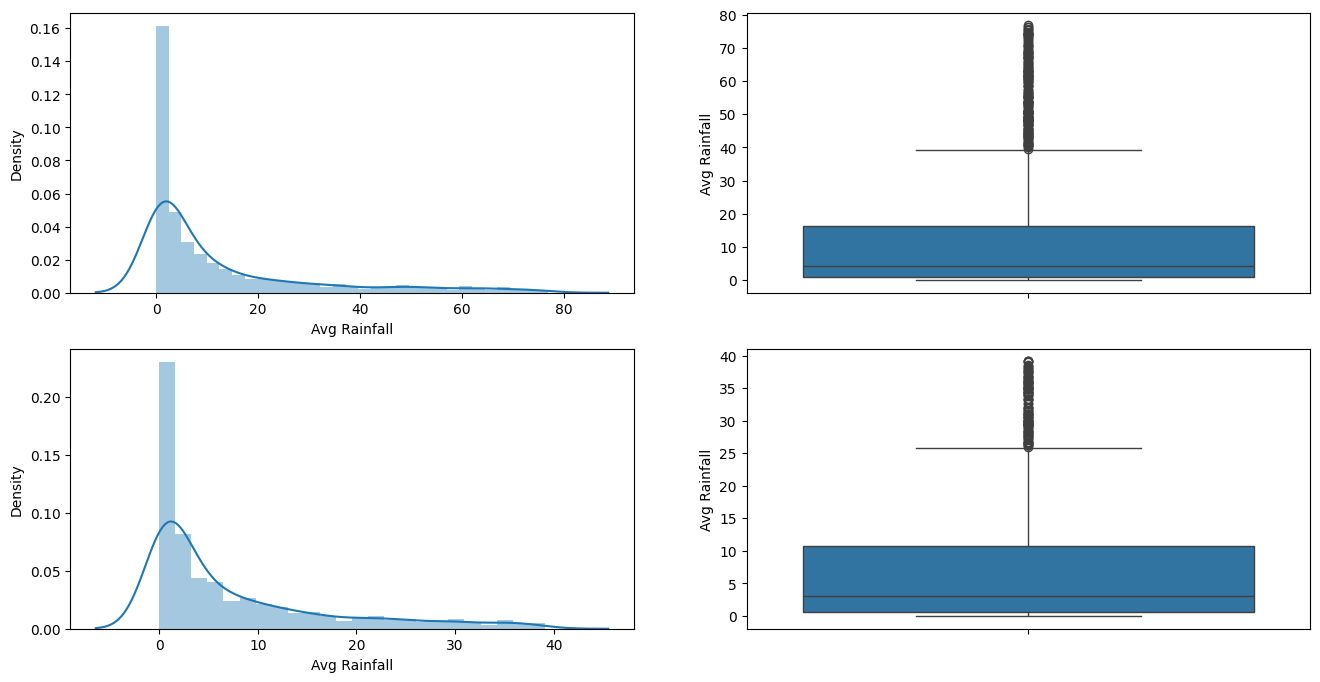

In [46]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df3['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df3['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df4['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df4['Avg Rainfall'])
plt.show()

In [47]:
percentile25 = new_df4['Avg Rainfall'].quantile(0.25)
percentile75 = new_df4['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df4[new_df4['Avg Rainfall'] > upper_limit]
new_df4[new_df4['Avg Rainfall'] < lower_limit]

new_df5 = new_df4[new_df4['Avg Rainfall'] < upper_limit]
new_df5.shape

(1563, 3)

In [51]:
percentile25 = new_df5['Avg Rainfall'].quantile(0.25)
percentile75 = new_df5['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df5[new_df5['Avg Rainfall'] > upper_limit]
new_df5[new_df5['Avg Rainfall'] < lower_limit]

new_df6 = new_df5[new_df5['Avg Rainfall'] < upper_limit]
new_df6.shape

(1480, 3)

In [54]:
percentile25 = new_df6['Avg Rainfall'].quantile(0.25)
percentile75 = new_df6['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df6[new_df6['Avg Rainfall'] > upper_limit]
new_df6[new_df6['Avg Rainfall'] < lower_limit]

new_df7 = new_df6[new_df6['Avg Rainfall'] < upper_limit]
new_df7.shape

(1431, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\2544749326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df6['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21272\2544749326.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df7['Avg Rainfall'])


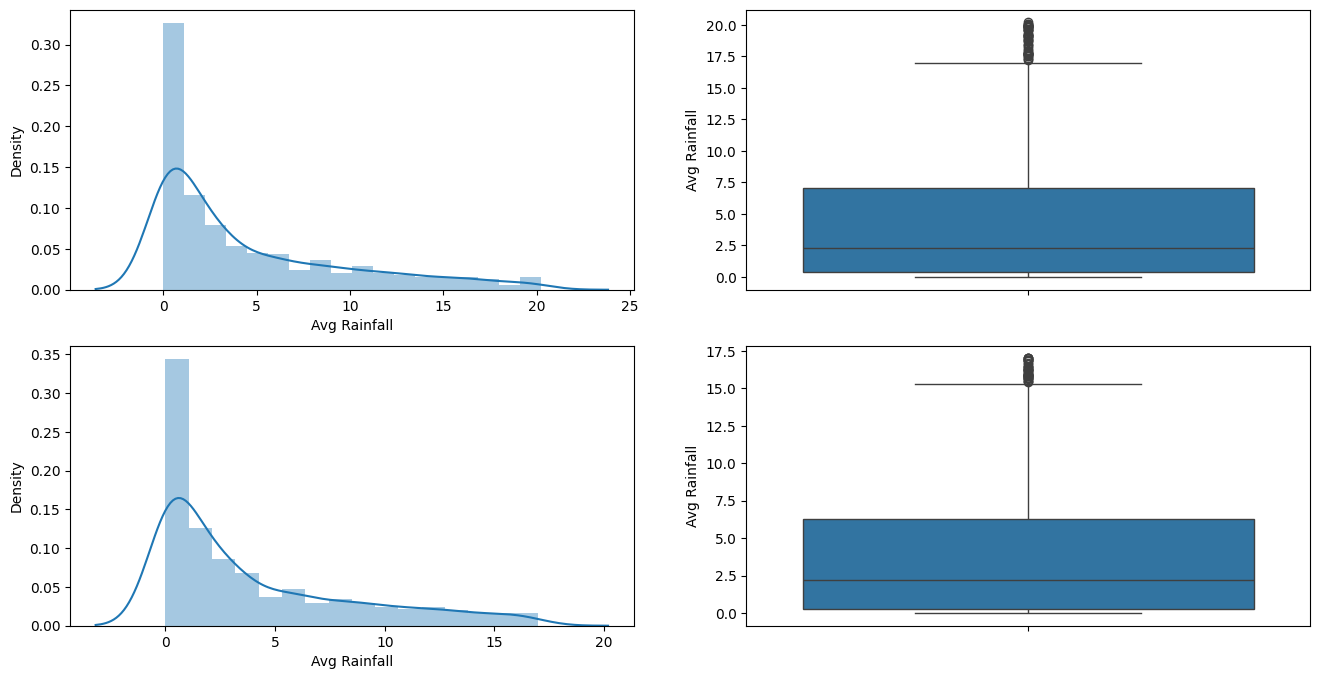

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df6['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df6['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df7['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df7['Avg Rainfall'])
plt.show()

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asanyarray(new_df7[['Year','Month']]).astype('int')
Y = np.asanyarray(new_df7['Avg Rainfall']).astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X.shape)
print(Y.shape)

(1431, 2)
(1431,)


In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, Y_train)

y_train_predict = knn_model.predict(X_train)
y_test_predict = knn_model.predict(X_test)

predicted = knn_model.predict([[1901, 2]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value for [1901, 1]:", predicted)


R-squared score on training data: 0.2957955121793513
R-squared score on test data: -0.10274416708173995
Predicted value for [1901, 1]: [8.2]


In [59]:
new_df7.head()

,Year,Month,Avg Rainfall
229,1901,2,5.8
458,1901,3,5.8
572,1901,3,15.7
687,1901,4,2.8
801,1901,4,10.7


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

random_forest_model = RandomForestRegressor(n_estimators=50, random_state=45)
random_forest_model.fit(X_train, Y_train)

y_train_predict = random_forest_model.predict(X_train)
y_test_predict = random_forest_model.predict(X_test)

predicted = random_forest_model.predict([[1901, 2]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value ", predicted)

R-squared score on training data: 0.7407942084354326
R-squared score on test data: -0.1351693757864938
Predicted value  [6.75333333]


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)
y_test_predict = linear_model.predict(X_test)

predicted = linear_model.predict([[1901, 2]])

train_r2_score = r2_score(Y_train, y_train_predict)
test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted)

R-squared score on training data: 0.0240484564375818
R-squared score on test data: -0.008652759474829574
Predicted value: [4.77971615]


In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decision_tree_model = DecisionTreeRegressor(random_state=45)
decision_tree_model.fit(X_train, Y_train)

y_train_predict = decision_tree_model.predict(X_train)
y_test_predict = decision_tree_model.predict(X_test)

predicted = decision_tree_model.predict([[1901, 2]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted[0])

R-squared score on training data: 0.820295214136332
R-squared score on test data: -0.5839353876585947
Predicted value: 5.0


In [65]:
import pickle

pickle.dump(decision_tree_model,open('mp_decesion_tree_model.pkl','wb'))

In [67]:
pickel_model = pickle.load(open('mp_decesion_tree_model.pkl','rb'))
pickel_model.predict([[1901, 2]])

array([5.])